In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display 
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('customers_data.csv')
df.head()

# The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.isnull().sum()  # Check missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
# Let's drop Channel and Region and find clusters of clients (client/customer segmentation) in totality
df = df.drop(['Channel', 'Region'], axis = 1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
df.index

RangeIndex(start=0, stop=440, step=1)

In [6]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
X = df.iloc[:, 0:6].values
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ..., 
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [8]:
# Standarize the features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
display(X_std)

#X_back = stdsc.inverse_transform(X_std)
#display(X_back)

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ..., 
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Explained Variance Ratio =  [ 0.44082893  0.283764  ]


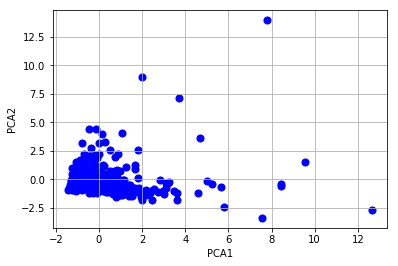

In [9]:
# Since there are more than 2 features, perform PCA so that we can atleast visualize something about data points!(may not be useful)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(X_std)

print "Explained Variance Ratio = ", pca.explained_variance_ratio_

plt.scatter(pca_matrix[:,0], pca_matrix[:,1], c='blue', marker='o', s= 50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

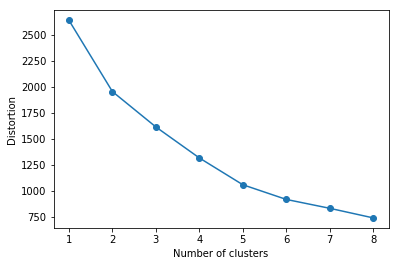

In [10]:
# Elbow Method - To choose K
def plot_elbow(X,range_clusters=10, init='k-means++',  n_init=10, max_iter=300, random_state=0):
    from sklearn.cluster import KMeans
    distortions = []
    for i in range (1,range_clusters+1):  
        km = KMeans(n_clusters=i, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,range_clusters+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    
plot_elbow(X_std,8)

Cluster Centers
[[-0.49977747  0.57700422  0.86560238 -0.34834571  0.85382117  0.08484667]
 [ 0.11231798 -0.35180297 -0.42614906  0.04408399 -0.41871361 -0.12299467]
 [ 1.01697969  3.88384518  3.77602602  0.26777557  3.9100999   1.07099298]
 [ 1.80335587  3.33298726  0.9425185   9.4098007  -0.44640902  8.96415723]]


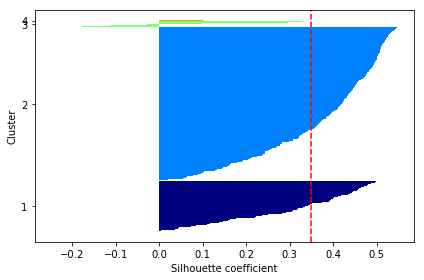

In [11]:
# Silhouette Plots - To evaluate clustering 

def plot_silhouette(X,y):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    cluster_labels = np.unique(y)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X,y, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()
 

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_std)
print "Cluster Centers"
print km.cluster_centers_
    
plot_silhouette(X_std,y_km)

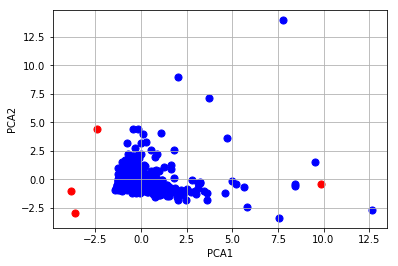

In [12]:
# Plotting Cluster members and centroids using PCA, may not be useful!

pca = PCA(n_components=2)
pca_centroids = pca.fit_transform(km.cluster_centers_)


plt.scatter(pca_matrix[:,0], pca_matrix[:,1], c='blue', marker='o', s= 50)      # samples
plt.scatter(pca_centroids[:,0], pca_centroids[:,1], c='red', marker='o', s= 50) # centroids
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

In [13]:
# Find the representative(centroid) for each cluster in original dimensions or feature space
centroids = km.cluster_centers_
Centroids = stdsc.inverse_transform(centroids)
print Centroids

[[  5686.63461538  10049.93269231  16167.88461538   1382.75         6947.75961538
    1763.875     ]
 [ 13419.20496894   3202.77950311   3906.11801242   3285.70186335
     887.39751553   1178.4068323 ]
 [ 24847.75        34427.91666667  43794.66666667   4370.41666667
   21503.08333333   4541.75      ]
 [ 34782.          30367.          16898.          48701.5           755.5
   26776.        ]]


0
[1, 2, 3, 4, 5, 6]
[  5686.63461538  10049.93269231  16167.88461538   1382.75         6947.75961538
   1763.875     ]
1
[1, 2, 3, 4, 5, 6]
[ 13419.20496894   3202.77950311   3906.11801242   3285.70186335
    887.39751553   1178.4068323 ]
2
[1, 2, 3, 4, 5, 6]
[ 24847.75        34427.91666667  43794.66666667   4370.41666667
  21503.08333333   4541.75      ]
3
[1, 2, 3, 4, 5, 6]
[ 34782.   30367.   16898.   48701.5    755.5  26776. ]


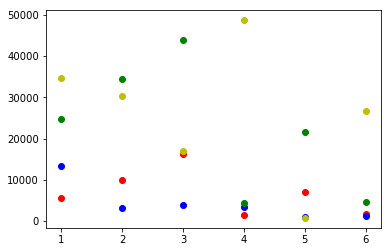

In [14]:
# To understand where every cluster representative stands with respect to other clusters in every dimension

def plot_centroids_ndims(n_dim,n_clusters):
    import matplotlib.cm as cm
    import itertools
    colors = itertools.cycle(["ro", "bo", "go", "yo", "ko", "mo"]) #6 dimensions, can be extended

    for i in range(n_clusters):
        print i
        x_axis = range(1,n_dim+1)
        print x_axis
        y_axis = Centroids[i:i+1,:].ravel()
        print y_axis
        plt.plot(x_axis, y_axis, next(colors))
    plt.show()


n_dim = 6
n_clusters = 4
plot_centroids_ndims(n_dim, n_clusters)

In [15]:
# Concatenate X (in original feature space) and Y (labels i.e. cluster membership)

np.set_printoptions(suppress=True) # To suppress scientific notation in numpy

X_orig = stdsc.inverse_transform(X_std)
print X_orig.shape
print y_km.shape


y = y_km.reshape(440,1)



data = np.concatenate((X_orig, y), axis=1)
data


(440L, 6L)
(440L,)


array([[ 12669.,   9656.,   7561., ...,   2674.,   1338.,      1.],
       [  7057.,   9810.,   9568., ...,   3293.,   1776.,      0.],
       [  6353.,   8808.,   7684., ...,   3516.,   7844.,      0.],
       ..., 
       [ 14531.,  15488.,  30243., ...,  14841.,   1867.,      0.],
       [ 10290.,   1981.,   2232., ...,    168.,   2125.,      1.],
       [  2787.,   1698.,   2510., ...,    477.,     52.,      1.]])

In [16]:
# Create the concatenated dataframe in original dimensions with cluster labels to perform further analysis
df = pd.DataFrame(data, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Cluster'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,1.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,1.0
5,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,1.0
6,12126.0,3199.0,6975.0,480.0,3140.0,545.0,1.0
7,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0,1.0
8,5963.0,3648.0,6192.0,425.0,1716.0,750.0,1.0
9,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0,0.0


In [17]:
df[df.Cluster == 0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0.0
9,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0,0.0
10,3366.0,5403.0,12974.0,4400.0,5977.0,1744.0,0.0
12,31714.0,12319.0,11757.0,287.0,3881.0,2931.0,0.0
13,21217.0,6208.0,14982.0,3095.0,6707.0,602.0,0.0
14,24653.0,9465.0,12091.0,294.0,5058.0,2168.0,0.0
16,1020.0,8816.0,12121.0,134.0,4508.0,1080.0,0.0
24,22647.0,9776.0,13792.0,2915.0,4482.0,5778.0,0.0
28,4113.0,20484.0,25957.0,1158.0,8604.0,5206.0,0.0


In [18]:
df[df.Cluster == 1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,1.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,1.0
5,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,1.0
6,12126.0,3199.0,6975.0,480.0,3140.0,545.0,1.0
7,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0,1.0
8,5963.0,3648.0,6192.0,425.0,1716.0,750.0,1.0
11,13146.0,1124.0,4523.0,1420.0,549.0,497.0,1.0
15,10253.0,1114.0,3821.0,397.0,964.0,412.0,1.0
17,5876.0,6157.0,2933.0,839.0,370.0,4478.0,1.0


In [19]:
df[df.Cluster == 2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
23,26373.0,36423.0,22019.0,5154.0,4337.0,16523.0,2.0
47,44466.0,54259.0,55571.0,7782.0,24171.0,6465.0,2.0
56,4098.0,29892.0,26866.0,2616.0,17740.0,1340.0,2.0
61,35942.0,38369.0,59598.0,3254.0,26701.0,2017.0,2.0
65,85.0,20959.0,45828.0,36.0,24231.0,1423.0,2.0
85,16117.0,46197.0,92780.0,1026.0,40827.0,2944.0,2.0
86,22925.0,73498.0,32114.0,987.0,20070.0,903.0,2.0
92,9198.0,27472.0,32034.0,3232.0,18906.0,5130.0,2.0
181,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,2.0
211,12119.0,28326.0,39694.0,4736.0,19410.0,2870.0,2.0


In [20]:
df[df.Cluster == 3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
183,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
325,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,3.0


For other clustering Models:
1. Run Clustering Algos 
2. Evaluate quality of clustering using silhouette plots
3. Get cluster labels for each observation and reconstruct observations in original feature space with cluster labels
4. Analyze each cluster e.g. calculate centroid (if not provided by sklearn apis) by calculating mean in each dimension, perform EDA on each cluster to see whether the clustering makes sense 